In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
os. getcwd()

'/Users/maslylabmacbook/Desktop/tf'

In [3]:
data_dir=(os. getcwd()+"/class")
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

3310


In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=100,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3310 files belonging to 5 classes.
Using 2648 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=100,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3310 files belonging to 5 classes.
Using 662 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog', 'Hotdog', 'Lizard', 'Salamander']


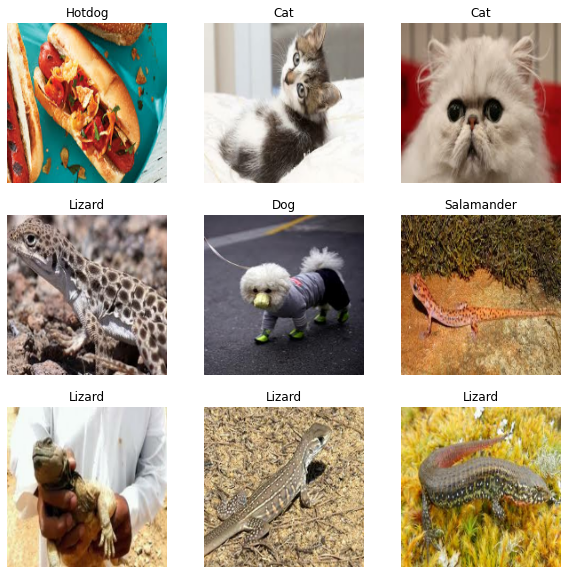

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
    
)

In [22]:
num_classes = 5
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

In [25]:
epochs = 15

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) #You can repeat this cell. Do it to get a better fitting but not too much because it will overfit

Epoch 1/15
83/83 [==============================] - 38s 443ms/step - loss: 1.5733 - accuracy: 0.3164 - val_loss: 1.5425 - val_accuracy: 0.3112
Epoch 2/15
83/83 [==============================] - 39s 469ms/step - loss: 1.2922 - accuracy: 0.4286 - val_loss: 1.1863 - val_accuracy: 0.5166
Epoch 3/15
83/83 [==============================] - 38s 461ms/step - loss: 1.1850 - accuracy: 0.4956 - val_loss: 1.1630 - val_accuracy: 0.5136
Epoch 4/15
83/83 [==============================] - 41s 494ms/step - loss: 1.0804 - accuracy: 0.5595 - val_loss: 1.5085 - val_accuracy: 0.4456
Epoch 5/15
83/83 [==============================] - 39s 463ms/step - loss: 1.0551 - accuracy: 0.5775 - val_loss: 0.9513 - val_accuracy: 0.6133
Epoch 6/15
83/83 [==============================] - 39s 471ms/step - loss: 0.9917 - accuracy: 0.6164 - val_loss: 0.9259 - val_accuracy: 0.6208
Epoch 7/15
83/83 [==============================] - 40s 479ms/step - loss: 0.9186 - accuracy: 0.6387 - val_loss: 0.9242 - val_accuracy: 0.6299

In [26]:
model.save('tfmodel.h5')
#it saves in tfworkshop folder

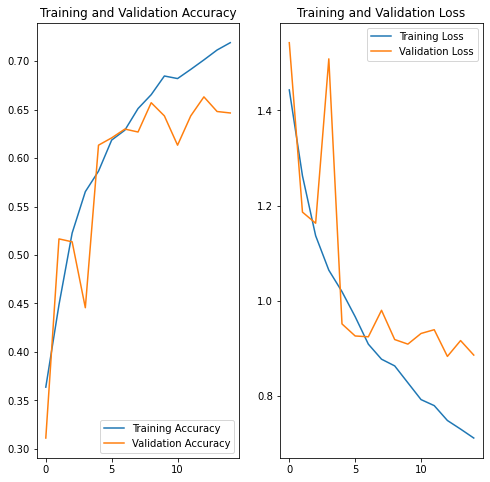

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
lmodel = tf.keras.models.load_model('tfmodel.h5')
lmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

In [29]:
epochs = 1

history = lmodel.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

83/83 [==============================] - 39s 455ms/step - loss: 0.6573 - accuracy: 0.7398 - val_loss: 0.9050 - val_accuracy: 0.6556


This image most likely belongs to Salamander with a 98.34 percent confidence.


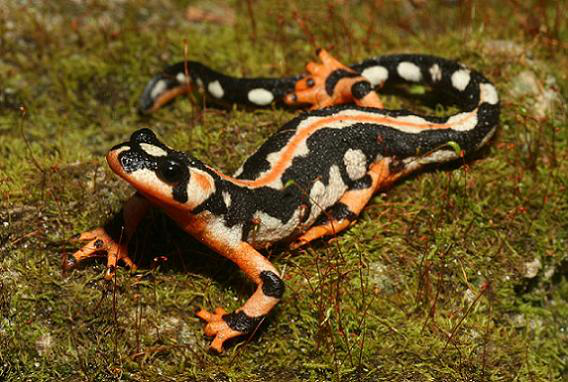

In [30]:
s=(os. getcwd()+"/sam.jpeg")
s=pathlib.Path(s)

img = keras.preprocessing.image.load_img(
    s, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(str(s))